# ANN to Predict Subject
How few channels are needed?

Setup: Javascript and ipynb stuff

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

## Load Functions

In [1]:
from fastai.vision import *
import os
import numpy as np
import pandas as pd
import pickle

In [2]:
path=pathlib.Path('/media/tris/tris_files/DEAP_dataset/DMD')
path

PosixPath('/media/tris/tris_files/DEAP_dataset/DMD')

## Load Original Data Labels

In [5]:
path = '/media/tris/tris_files/DEAP_dataset/data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/DEAP_dataset/data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/DEAP_dataset/data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [6]:
df=df.div(9) #normalize
df.head()

,valence,arousal,dominance,liking
0,0.856667,0.844444,0.766667,0.870000
1,0.900000,0.812222,0.808889,0.941111
2,0.953333,0.837778,1.000000,0.786667
3,0.548889,0.667778,0.680000,0.895556
4,0.773333,0.435556,0.798889,0.672222


## Set filenames and labels

In [7]:
filenames=[]
subject_labels=[]
for n in range (0,9):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
for n in range (9,32):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
df['file_name']=filenames
df['subject_label']=subject_labels
# df=df[['file_name','valence','arousal','dominance','liking']]
df=df[['file_name','subject_label']]
df.tail()

,file_name,subject_label
1275,S32T36,32
1276,S32T37,32
1277,S32T38,32
1278,S32T39,32
1279,S32T40,32


In [8]:
# for i in range(1,33):
#     for ii in range(1,41):
#         os.rename(r'/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/T'+str(ii)+'S'+str(i)+".png",r'/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/S'+str(i)+'T'+str(ii)+".png")

In [9]:
# from PIL import Image

# for i in range (0,1280):
    
#     im = Image.open(r"/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/"+str(df.file_name[i])+".png")
#     im1=im.crop((0,0,1450,1030))
#     im1.save("/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps_re/"+str(df.file_name[i])+".png")

In [9]:
path=pathlib.Path('/media/tris/tris_files/DEAP_dataset/DMD')
path

PosixPath('/media/tris/tris_files/DEAP_dataset/DMD')

In [9]:
df.to_csv(path/'labels_proc.csv', index=False)

In [3]:
df = pd.read_csv(path/'labels_proc.csv') #load labels
df.tail()

,file_name,subject_label
1275,S32T36,32
1276,S32T37,32
1277,S32T38,32
1278,S32T39,32
1279,S32T40,32


## Data loader

In [4]:
src = (ImageList.from_csv(path, 'labels_proc.csv', folder='heatmaps_10ch', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['subject_label'],label_cls=CategoryList)
#        .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
       .transform()
       .databunch(bs=4).normalize())

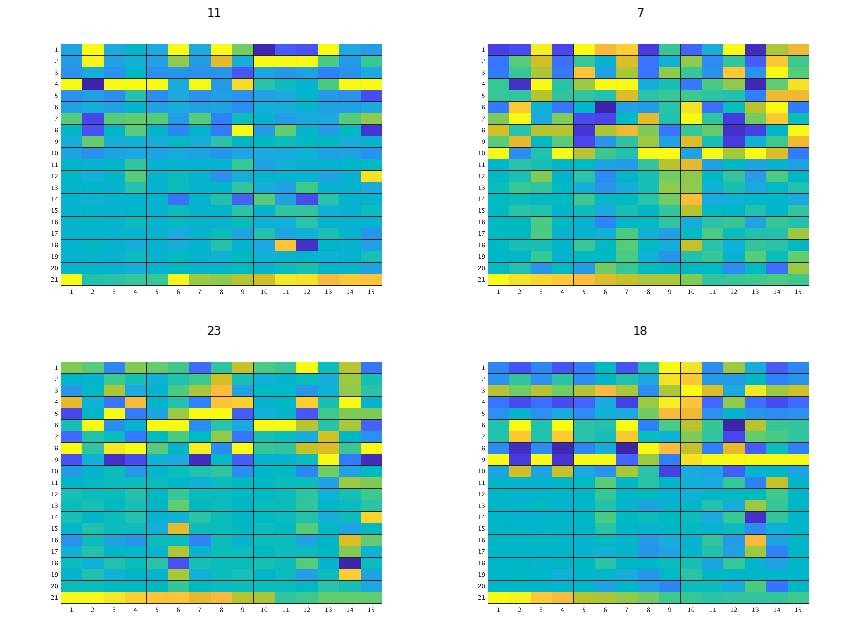

In [5]:
src.show_batch(rows=4, figsize=(12,9))

## Setup Network

In [6]:
learn = cnn_learner(src, models.resnet18, metrics=accuracy)

In [7]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 521, 729]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 521, 729]       128        True      
______________________________________________________________________
ReLU                 [64, 521, 729]       0          False     
______________________________________________________________________
MaxPool2d            [64, 261, 365]       0          False     
______________________________________________________________________
Conv2d               [64, 261, 365]       36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 261, 365]       128        True      
______________________________________________________________________
ReLU                 [64, 261, 365]       0          False     
___________________________________________________

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


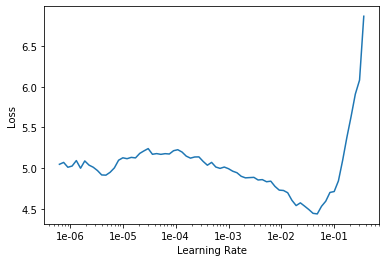

In [8]:
learn.lr_find()
learn.recorder.plot()

## Train last layers

In [9]:
lr = 1e-2
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.312781,2.340102,0.519531,01:14
1,1.743926,21.194517,0.121094,01:14
2,1.628847,187.479721,0.027344,01:14
3,1.402574,91.338333,0.105469,01:15
4,0.792085,381.949615,0.019531,01:15
5,0.491815,0.202895,0.972656,01:15
6,0.254337,0.045609,0.992188,01:15
7,0.484342,0.041223,0.992188,01:16


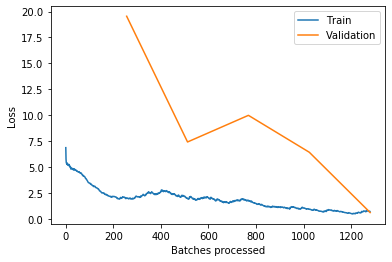

In [10]:
learn.recorder.plot_losses()

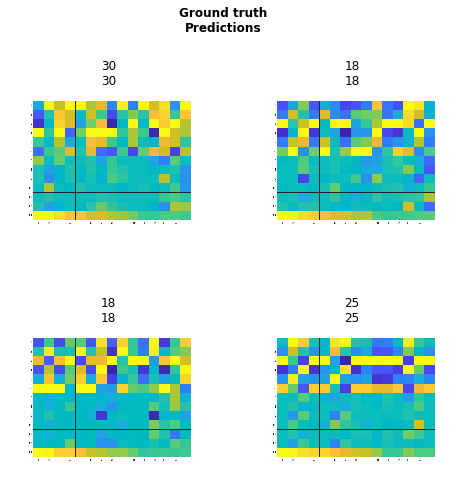

In [11]:
learn.show_results()

## Train the whole network

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


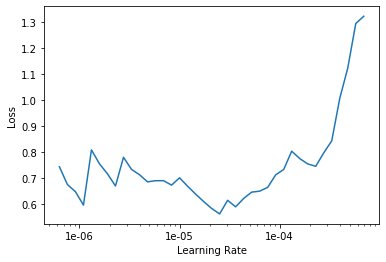

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
lr = 1e-5
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.479122,5.097594,0.441406,01:38
1,0.623014,1.123598,0.761719,01:38
2,0.647806,1.399867,0.750000,01:38
3,0.576133,2.241140,0.640625,01:42


In [15]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.426211,4.175450,0.507812,01:38
1,0.629614,6.590438,0.363281,01:39
2,0.514516,8.935981,0.308594,01:38


KeyboardInterrupt: 

## Results

In [22]:
df_res=[]
df_res = pd.DataFrame(columns=['no_channels','accuracy'])

In [23]:
info0 = {'no_channels': 2, 'accuracy' : 63}
info1 = {'no_channels': 6, 'accuracy' : 91}
info2 = {'no_channels': 10, 'accuracy' : 99}
info3 = {'no_channels': 15, 'accuracy' : 99}
info4 = {'no_channels': 20, 'accuracy' : 99}
info5 = {'no_channels': 25, 'accuracy' : 99}
info6 = {'no_channels': 30, 'accuracy' : 99}
info7 = {'no_channels': 32, 'accuracy' : 99}
    
df_res = df_res.append([info0, info1, info2, info3, info4, info5, info6, info7], ignore_index=True)
# df_res = df_res.append(info1, ignore_index=True)

In [24]:
df_res

,no_channels,accuracy
0,2,63
1,6,91
2,10,99
3,15,99
4,20,99
5,25,99
6,30,99
7,32,99


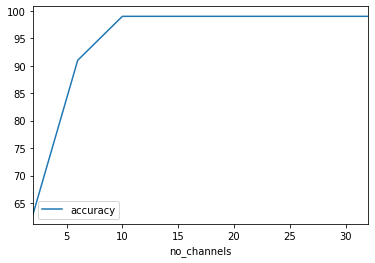

In [28]:
df_res.plot(x='no_channels',y='accuracy',kind='line')